In [1]:
from transformers import AutoProcessor, AutoModelForVision2Seq
from IPython.display import display, Markdown

model = AutoModelForVision2Seq.from_pretrained("nvidia/Cosmos-Reason1-7B", dtype="auto", device_map="auto")

processor = AutoProcessor.from_pretrained("nvidia/Cosmos-Reason1-7B")

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-12-16 19:36:04.603720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-16 19:36:09.131579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jupyter/.local/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 4/4 [04:08<00:00, 62.25s/it]
'(ProtocolErr

In [2]:
def generate_description(prompt_text, image_path, max_new_tokens):

    messages = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "You are a helpful assistant. Answer the question in the following format: <think>\nyour reasoning\n</think>\n\n<answer>\nyour answer\n</answer>."}
            ]
        },
        {
            
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image_path,
                },
                {"type": "text", "text": prompt_text},
            ],
        }
    ]

    inputs = processor.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_dict=True,
        return_tensors="pt"
    )
    inputs = inputs.to(model.device)

    generated_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    
    return output_text[0] if output_text else ""

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Table scene

In [4]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the table.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user wants me to list every single item on the table based on the given environment. First, I need to parse the video carefully and make sure I don't miss any details.

Starting with the desk itself. It's a white desk with a smooth surface, so that's the base. On the left side, there's a transparent lamp with a white base. Next to it are some earphones with black and blue accents. Then there's a purple notebook under a blue pen. The notebook has a grid pattern and a spiral binding. 

In the center, there's a black computer mouse on a colorful mouse pad. To the right of the mouse pad, there's a yellow sticky note holder with a small notepad attached. Adjacent to that is a white charger with a cable. 

On the far right side, there's a silver water bottle with a black cap. Behind the water bottle is a white fan with a black interior. Above all these items is a purple calendar with white text and images. There are also some loose papers near the lamp.

I need to check if all these items are correctly identified and positioned. Let me verify each one:

1. Transparent lamp with white base - left side, next to earphones.
2. Earphones with black and blue accents - left side, next to the lamp.
3. Purple notebook under blue pen - left side, next to earphones.
4. Blue pen on top of the purple notebook.
5. Black computer mouse - center, on a mouse pad.
6. Colorful mouse pad under the mouse.
7. Yellow sticky note holder - right side, next to the charger.
8. White charger with cable - right side, adjacent to the sticky notes.
9. Silver water bottle with black cap - far right.
10. White fan behind the water bottle.
11. Purple calendar above all items.
12. Loose papers near the lamp on the left.

I think that's all. The key points are the positions and colors. The user wants each item listed with their primary color and size. Since most items are shown as standard sizes (like a notebook, pen, mouse), they're probably medium-sized. The lamp and fan might be larger, but the video doesn't specify unusual sizes. The calendar is likely large enough to cover the wall behind. The water bottle is a typical size. The mouse and pen are smaller. The earphones are small. The sticky notes and charger are also small. The loose papers are scattered, so maybe small or medium depending on quantity. But since they're just papers, probably small. 

Wait, the problem says "no matter how small or partially obscured." The video shows "some loose papers," so they might be partially visible. But the user wants every item detected. So I should include them as a separate item even if they're small. 

No other items are shown on the desk. The wall calendar is above the desk, so it's not on the desk. The fan is behind the water bottle, so it's on the desk's right side. The lamp is on the left. The mouse is center. The charger and sticky notes are right. Water bottle far right. Calendar at the top. Earphones left near lamp. Notebook left under pen. Pen on notebook. 

Yes, that seems comprehensive. Now, present the answer in the required format.
</think>

<answer>
Here's a list of every item on the table, along with their primary colors, estimated sizes, and relative positions:

1. **Transparent Lamp with White Base** - Left side of the desk, next to the earphones.  
   - **Color**: Clear (transparent) with a white circular base.  
   - **Size**: Medium (typical desk lamp size).  

2. **Black and Blue Earphones** - Left side of the desk, adjacent to the lamp.  
   - **Color**: Black with blue accents.  
   - **Size**: Small (standard earphone size).  

3. **Purple Notebook** - Left side of the desk, beneath the blue pen.  
   - **Color**: Purple with a grid pattern and spiral binding.  
   - **Size**: Medium (standard notebook size).  

4. **Blue Pen** - Resting on top of the purple notebook.  
   - **Color**: Bright blue.  
   - **Size**: Standard pen size.  

5. **Black Computer Mouse** - Center of the desk, placed on a colorful mouse pad.  
   - **Color**: Black.  
   - **Size**: Medium (standard computer mouse size).  

6. **Colorful Mouse Pad** - Center-right of the desk, under the mouse.  
   - **Color**: Multicolored design.  
   - **Size**: Medium (standard mouse pad size).  

7. **Yellow Sticky Note Holder** - Right side of the desk, next to the white charger.  
   - **Color**: Bright yellow.  
   - **Size**: Small (compact holder with attached notepad).  

8. **White Charger** - Right side of the desk, adjacent to the sticky note holder.  
   - **Color**: White with a black cable.  
   - **Size**: Small (standard phone/tablet charger).  

9. **Silver Water Bottle** - Far right side of the desk.  
   - **Color**: Metallic silver with a black cap.  
   - **Size**: Medium (typical water bottle size).  

10. **White Fan** - Behind the water bottle, slightly to the right.  
    - **Color**: White with a black interior.  
    - **Size**: Medium (small desk fan).  

11. **Purple Wall Calendar** - Mounted above the desk, centered at the top.  
    - **Color**: Purple with white text/images.  
    - **Size**: Large (covers a significant portion of the wall).  

12. **Loose Papers** - Near the lamp on the left side of the desk.  
    - **Color**: White with printed text/images.  
    - **Size**: Varies, but primarily small sheets.  
</answer>

In [5]:
prompt_text = """
    You are an assistant analyzing a photo of a tabletop. Your task is to list every visible object **on the table surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the table]

    Rules:
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.
    3. Include very small items (e.g. pen, key, coin) if visible.
    4. If an object is partially hidden but identifiable, include it.
    5. Do not describe position relative to other objects (e.g. "next to cup") — use absolute position on table (left/center/right).
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break down the problem. The user wants a list of all visible objects on the tabletop surface based on the given environment. They specified not to include floor, walls, or people, and to focus only on objects on the table.

First, I'll review the video carefully. The main items shown are the desk with various objects. Starting from the left, there's a transparent lamp with a white base and black cord. Next to it are two markers (blue and red caps). Then a blue pen and a black computer mouse. There's a notebook titled "Collegeblock" under the mouse. 

Moving to the right, there's a yellow sticky note pad, a black cable, a purple and white calendar titled "LICORICE & LIMX-Kalender 2023" at the back. A small white fan is near the calendar, along with a black water bottle next to it. 

I need to ensure that each object is listed once, with its correct position (left, center, right) and size (small, medium, large). Since the lamp has a transparent body but a white base, maybe consider the base as part of the object's size. The markers, pen, and mouse are small. The notebook is under the mouse, so perhaps medium-sized. The cable is thin, so small. The calendar is hanging on the wall, but since it's on the table, maybe it's part of the items. Wait, the video shows the calendar is hanging on the wall behind the desk. So the actual items on the table would be the sticky notes, cable, fan, water bottle, etc. Wait, the calendar is on the wall, so not on the table. So the objects on the table are the lamp, markers, pen, mouse, notebook, sticky notes, cable, fan, water bottle. 

Wait, the calendar is on the wall, so not included. The lamp is on the left, markers next to it, pen center-left, mouse center-right on the notebook. Then right side has sticky notes, cable, fan, water bottle. The fan is near the calendar, which is on the wall, so fan is on the table. The water bottle is on the far right. 

I need to make sure all these are listed correctly. Let me check again. The lamp is left side, transparent with white base. Markers next to lamp (left), pen next to mouse (center), mouse on notebook (center-right), sticky notes to the right of mouse (so center-right as well?), cable running across (maybe center?), fan near calendar (right?), water bottle far right. 

Wait, the fan is positioned near the calendar, which is on the wall. So fan is on the table. The water bottle is on the far right. So the positions would be:

Left: lamp, markers

Center: pen, mouse (on notebook), cable

Right: sticky notes, fan, water bottle

But the notebook is under the mouse, so mouse is on the notebook, which is in the center-right. The sticky notes are to the right of the mouse, so center-right as well. The fan is near the calendar, which is on the wall, but the fan is on the table. Then the water bottle is far right.

So the list would be:

1. Transparent lamp with white base (left)

2. Blue marker with blue cap (left)

3. Red marker with red cap (left)

4. Blue pen (center-left)

5. Black computer mouse (center-right on notebook)

6. Notebook titled "Collegeblock" (under mouse, center-right)

7. Yellow sticky note pad (right of mouse, center-right)

8. Black cable (running across table, center)

9. Small white fan (right near calendar)

10. Black water bottle (far right)

I need to present each object with one line, using the specified format. Also, check sizes: lamp with base might be medium, but since it's a desk lamp, maybe large? Wait, the lamp has a transparent body and white base. If it's a standard desk lamp, the base might be substantial. Maybe medium-sized. But the markers, pen, mouse are small. The notebook is medium-sized. The cable is thin, small. Sticky notes are small. Fan is small. Water bottle is medium. 

But the user wants size only if clear. The original video doesn't specify exact sizes, so maybe omit sizes unless certain. The instruction says if unsure, skip. So perhaps describe all as small except maybe the lamp and notebook. But the problem says "size: small / medium / large" If the lamp is a desk lamp, maybe medium. The notebook is under the mouse, so maybe medium. But the user might not want to assume sizes. The example in the problem didn't include sizes, so probably just list as is. 

So the final list:

- Transparent lamp with white base, left

- Blue marker with blue cap, left

- Red marker with red cap, left

- Blue pen, center-left

- Black computer mouse, center-right

- Notebook titled "Collegeblock", center-right

- Yellow sticky note pad, right

- Black cable, running across

- Small white fan, right

- Black water bottle, far right

Check for any possible overlaps. The mouse is on the notebook, which is center-right. The sticky notes are to the right of the mouse, so they're also center-right but separate. The fan is near the calendar, which is on the wall, so fan is on the table. Water bottle is far right. That seems okay. No other objects shown. So this should cover all visible objects on the table.
</think>

<answer>
- Transparent lamp with white base, left  
- Blue marker with blue cap, left  
- Red marker with red cap, left  
- Blue pen, center-left  
- Black computer mouse, center-right (on "Collegeblock" notebook)  
- Yellow sticky note pad, right  
- Black cable, running across center  
- Small white fan, right (near wall calendar)  
- Black water bottle, far right
</answer>

In [6]:
prompt_text = """
    You are analyzing an image of a table with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Cup
    Notebook
    Pen
    Calculator
    Thermos
    Mouse
    Calendar
    Lamp
    Clock
    Two markers (green and pink)
    Power bank / charging block
    Knife
    Fan

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user wants me to go through the image and list out which objects are present and which are missing. Let me start by understanding the details provided.

The scene is an indoor workspace with a white desk against a beige wall. There's a purple calendar from 2023 titled "LICORICE & NIX-Kalender" at the back center. On the right side, there's a small white fan behind a black thermos with a silver cap. In front of the fan, there's a blue notebook labeled "Collegeblock," a black computer mouse, and some tangled black cables. To the left of the mouse, there are two markers (green and pink). On the far left, there's a white power bank with a cable plugged into it. A clear plastic lamp is on the left edge, and there are crumpled papers near the calendar.

Now, the objects listed in the instruction are: Cup, Notebook, Pen, Calculator, Thermos, Mouse, Calendar, Lamp, Clock, Two markers (green and pink), Power bank / charging block, Knife, Fan.

Let me check each one. The Calendar is present as per the video. The Thermos is there (black with silver cap). The Mouse is present (black). The Two markers are explicitly shown as being on the desk. The Power bank is also there (white with a cable). The Fan is present (small white one behind the thermos). The Notebook is the Collegeblock one. The Lamp is shown as a clear plastic lamp on the left. The Cable is shown but not listed as an object, so maybe that's part of the power bank setup. The Clock isn't shown anywhere, so that's missing. The Knife isn't present either. So the missing items are Clock and Knife. Also, the user might have intended the markers to be considered pens, but they specifically called them markers. However, since they're present, maybe that's okay. But strictly speaking, markers are not pens. But the user might consider them as pens if they're used similarly. However, the answer should stick to the exact names. So the missing items are Clock, Knife.
</think>

<answer>
Present objects: Calendar, Thermos, Mouse, Two markers (green and pink), Power bank / charging block, Lamp, Fan.  
Missing objects: Clock, Knife.  

Reasoning: The video shows a "white wall clock" (Clock) and a "clear plastic lamp" (Lamp), neither of which are present in the scene. Additionally, a knife is not shown anywhere in the setup.
</answer>

In [7]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a container, used for storing drinks? (If yes name it — if not, write “No”)  
    2. Is there a phone on the table? (Answer: Yes / No)  
    3. Is there a device for a laptop on the table? (Answer: Yes / No)  
    4. What black items are visible on the table? (List them — if none, write “None”)  
    5. Is there a writing instrument on the table? (If yes name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break this down. The user is asking about various items on the table shown in the scene. I need to check each question one by one based on the details provided.

First, the container for drinks. The video shows a dark-colored bottle with a silver cap on the right side of the desk. That sounds like a typical drink container, maybe a water bottle or something similar. So yes, there is a container used for drinks. The name here would be the bottle itself since that's the specific item shown.

Next, is there a phone on the table? The items listed include a notebook, pen, mouse, fan, calendar, cables, and the bottle. The video does not show a phone anywhere. So the answer should be No.

Third, a device for a laptop. The items listed don't include a laptop or any laptop accessories like a docking station. The mouse is present, but without a laptop, it's unclear if it's connected. However, the question is about the device itself. Since there's no laptop shown, the answer is No.

Fourth, black items on the table. The mouse is black, and there's a dark-colored bottle. Also, the cables might be black depending on their description. Wait, the cables are shown as black and white. So the black items would be the mouse and possibly some cables. But the question asks to list them. Let me check again. The mouse is explicitly shown as black. The bottle is dark-colored, which could be black. The cables are black and white, so they have some black parts. So the answer should include the mouse and the bottle. But the user might consider the cables as partially black. However, the question says "black items," so maybe just the mouse and the bottle. Need to confirm.

Fifth, a writing instrument. There's a blue pen shown next to the notebook. Pens are writing instruments, so yes. The pen is blue, but the question just asks for black items. Wait, the pen is blue, so maybe that's not black. Unless there's another writing tool. The notebook has a spiral binding, but that's not a writing instrument. The pen is the only one shown. So if the pen is blue, then maybe there's no black writing instrument. Wait, the user's question 5 says "What black items...?" So if there's no black pen, then the answer would be No. But the pen in the video is blue. So perhaps the answer is No for the writing instrument. Wait, but the user might have made a mistake in color description. Alternatively, maybe the cables are considered writing instruments? No, cables aren't. So the pen is blue, not black. Therefore, the answer to the writing instrument question is No.

Putting it all together:

1. Yes (the bottle)
2. No
3. No
4. Mouse, Bottle, and possibly the black parts of the cables
5. No (since the pen is blue)

But the user wants the answers as per the questions. Let me check again.

The original scene mentions: "a dark-colored bottle with a silver cap" - dark-colored could be black. The mouse is black. The cables are black and white. So the black items are mouse, bottle, and some cables. But the question 4 asks "What black items are visible on the table?" So the answer should list those. But the user might expect a list. However, the answer format allows up to five sentences. So perhaps list the black items.

But the user's example response in the problem statement for similar questions might just say "Yes" or "No" Wait, looking at the output requirements: for question 1, if yes, name it. If no, write "No" Similarly for others. So if there are multiple black items, can we list them?

The question 4 is "What black items are visible on the table?" So the answer should list all the black items. From the video:

- Mouse (black)
- Dark-colored bottle (assuming dark is black)
- Cables (black and white, so black parts)

But the user might consider the cables as having black parts, so they count. So the answer would be: Mouse, Bottle, and Cables. But the user might want separate entries. However, the answer needs to be concise. Let me check the original problem's example. For instance, if the question was "what are the fruits" and there are multiple, the answer lists them. So here, the answer should list the black items. So the correct answer would be "Mouse, Bottle, and Cables" but since the cables are black and white, maybe just the mouse and bottle. Alternatively, the cables are considered black items even though they have white. Hmm.

Alternatively, maybe the answer is "Mouse, Bottle, and black cables" But the problem states to use a phrase like "Name of item" So perhaps list them as "Mouse, Bottle, cables"

But the original scene says "black and white cables" So they are black items but with white parts. So they are black cables. So the answer would be "Mouse, Bottle, and cables"

But the user might have intended that the cables are black and white, so they are not entirely black. In that case, they might not count. But since the user is asking for black items, the cables' black parts are part of them. So perhaps the answer includes cables.

Alternatively, maybe the only black items are the mouse and the bottle. The cables are black and white, so maybe not fully black. So the answer would be "Mouse and Bottle"

But the user's description says "black and white cables", so they are black items but with white. So they are black cables. So they are black items. Therefore, the answer should include cables.

So the correct answer for 4 is "Mouse, Bottle, and cables"

Now, checking the other questions:

5. Is there a writing instrument? The pen is blue, so No.

So compiling the answers:

1. Yes (the bottle)
2. No
3. No
4. Mouse, Bottle, and cables
5. No

But the user wants each answer in a separate line. So the final answer would be:

<answer>
1. Yes
2. No
3. No
4. Mouse, Bottle, and cables
5. No
</answer>
</think>

<answer>
1. Yes
2. No
3. No
4. Mouse, Bottle, and cables
5. No
</answer>

## Bed scene

In [8]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the bed.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user wants me to list every single item on the bed based on the given environment. Let me start by going through the video again carefully.

The bed has a turquoise bedsheet with a swirling pattern and two pillows. One pillow is solid white, and the other has teal leaf patterns. There's a laptop on the bed near the top edge, slightly open but facing away from the camera. Next to the laptop is a small gray rectangular object. Then there's a coral-colored blanket with green leaf designs draped over the right side of the bed. 

Wait, the video shows "on the bed" so all these items should be placed there. Let me check again. The laptop is on the bed near the top edge, the gray object is next to it, and the coral blanket is on the right side. The pillows are also on the bed, one on the left (white) and the other on the right (teal leaves). 

I need to make sure I don't miss any items. The lamp is on a nightstand beside the bed, so that's not on the bed. The wall outlet is on the wall, so that's also not on the bed. The bed itself is covered with the sheets and blankets, but those are part of the bed's bedding. The items on the bed are the pillows, laptop, gray object, and coral blanket. 

Let me structure this. The pillows are two: one white on the left, one teal on the right. The laptop is near the top edge, slightly open. Then next to the laptop is the gray object. On the right side of the bed is the coral blanket. Each of these should be listed with their position and size. Since they're on a bed, sizes would typically be medium-sized items like pillows, a laptop, and a blanket. The gray object is small, maybe a book or a tablet. 

I should present this in a clear list, making sure each item is shown correctly. No need to mention the bed itself since it's the base. Let me double-check the original text to confirm placement. Yes, the laptop is on the bed near the top edge, the gray object next to it, and the coral blanket on the right. The pillows are at the head of the bed, one on each side. That's all the items on the bed. I think that's everything. Now I'll format the answer accordingly.
</think>

<answer>
On the bed, there are four main items:  
1. **Two pillows**: One solid white pillow on the left side and one teal-patterned pillow with leaf designs on the right side.  
2. **A black laptop**: Placed near the top edge of the bed, slightly open and facing away from the camera.  
3. **A small gray rectangular object**: Positioned next to the laptop.  
4. **A coral-colored blanket with green leaf patterns**: Draped over the right side of the bed.  

These items are arranged with the pillows at the head of the bed, the laptop and gray object near the top edge, and the blanket extending toward the foot of the bed.
</answer>

In [9]:
prompt_text = """
    You are an assistant analyzing a photo of a bed. Your task is to list every visible object **on the bed surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the bed]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  
    5. Do not describe position relative to other objects (e.g. "next to lamp") — use absolute position on table (left/center/right).

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break down the problem. The user wants a list of all visible objects on the bed surface based on the given environment. The key points here are to focus only on the bed surface, avoid adding any new information like brands or assumptions about colors and sizes unless they're explicitly shown.

First, I'll review the video to identify all objects shown as being on the bed. The main elements listed are the pillows, mattress, blanket, laptop, and a white card. Let me check each one:

1. **Pillows**: There are two rectangular pillows with light green patterns. One has a white pillowcase underneath. Their position is towards the top left corner of the bed. Since they're on the bed, they should be included. The size isn't specified, but since they're standard pillows, I'll assume medium size each.

2. **Mattress**: The mattress is turquoise with a wavy pattern. It's shown as being under the pillows and blanket. The mattress itself is part of the bed structure, so maybe not considered a separate object? But the video shows it's on the bed, so perhaps it's part of the bedding. However, the user might want just the loose items. Hmm, but the instruction says "visible objects on the bed surface," so the mattress is part of the bed's surface. Maybe not needed unless there's something specific on it. Wait, the mattress has a pattern but isn't an object to list.

3. **Blanket**: A peach-colored blanket with olive green leaf patterns is draped over the right side of the bed. It's folded back to reveal the mattress. So the blanket is on the right side, covering part of the bed. Since it's a blanket, it's a纺织品 (textile product), so it should be listed. The size would be large enough to cover the bed's right side, so probably large.

4. **Laptop**: Placed near the center of the bed. It's black with a visible keyboard and screen edge. The screen is off. So another object on the bed. Size would be typical for a laptop, maybe medium-large.

5. **White Card**: A small white card lies flat next to the laptop. That's a small object on the bed. 

Now, checking for any other objects shown. The nightstand is beside the bed on the right, but the question is about objects on the bed surface. The lamp is on the nightstand, so not included here. The plug and cable are shown as being on the nightstand's drawer, also not part of the bed. The wall outlet is on the wall, so no.

So the objects on the bed are pillows (two), mattress (as part of the bed, maybe not listed as an object), blanket, laptop, and white card. Wait, the mattress is part of the bed's surface but not an object placed on it. The pillows are on the bed, so they count. The blanket is draped over the bed, so it's on the surface. The laptop and card are on the bed.

Wait, the original video shows "the bed" as having these items. The user wants objects on the bed surface. So the pillows, blanket, laptop, and card are the ones listed. The mattress is part of the bed's structure, so maybe not considered an object here. The answer should include the pillows (two), the blanket, the laptop, and the white card. The size of each needs to be determined based on the video.

Pillows: Two rectangular pillows, each medium size. Position: top left corner of the bed. The blanket is on the right side, so perhaps covering part of the bed. The laptop is near the center. The white card is next to the laptop.

So compiling the list:

- Pillows (two), [light green], [medium], [top left]
- Mattress (part of the bed, maybe not listed as an object)
- Blanket, [peach with green leaves], [large], [right side]
- Laptop, [black], [medium], [center]
- White card, [small], [very small], [next to laptop]

Check if all are on the bed surface. Yes. Ensure no other objects are present. The answer should list these five items.
</think>

<answer>
- Pillows, light green, medium, top left
- Mattress, turquoise, large, entire bed (implied)
- Blanket, peach with olive green leaf patterns, large, right side
- Laptop, black, medium, center
- White card, small, very small, next to laptop
</answer>

In [10]:
prompt_text = """
    You are analyzing an image of a bed with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Bottle
    Laptop
    Earbuds / AirPods case
    Phone
    Two pillows
    Blanket


Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user wants me to go through the image and figure out which of the listed objects are present. Let me start by recalling the details provided.

The bed has a turquoise and white patterned fitted sheet and a coral blanket with green leaf patterns. There's a laptop open on the bed near the center, showing a black screen. Two pillows are shown: one teal with swirls and another plain white. On the bedside table to the right, there's a pink lamp with a floral design. Also shown is a small white object next to the laptop, possibly earbuds or a phone case.

Now, looking at the objects listed: Bottle, Laptop, Earbuds/AirPods case, Phone, Two pillows, Blanket. The laptop is definitely present since it's explicitly shown as being on the bed. The two pillows are there too, as shown. The coral blanket with green leaves is also clearly stated. The small white object could be either earbuds or a phone case, so that's covered under "Earbuds / AirPods case" or "Phone." But since the video specifies "possibly," maybe both are possibilities, but the user might consider one of them as present. However, the answer should only list what's definitely there. Wait, the phone isn't shown directly, but the small white object is "possibly" earbuds or a phone case. So maybe the phone isn't present, but the case is. Alternatively, the phone itself might be present if the case is there. Hmm. The bottle isn't shown anywhere in the video. So the bottle is missing. The laptop, two pillows, blanket, and the small white object (which could be a phone or earbuds case) are present. But the actual phone or bottle isn't shown. So the answer should list which ones are present and which are missing. Let me check again. The video shows: "Laptop - On the bed, slightly towards the center. Coral blanket... Small white object next to the laptop..." So the small white object is there, but it's unclear if it's a phone or earbuds case. Since the user lists "Earbuds / AirPods case" and "Phone" as separate options, but the video only mentions a small white object possibly being one of those. However, in the absence of explicit mention of a phone, maybe we can't assume it's there. So the phone might not be present. Therefore, the present items are laptop, two pillows, blanket, and the small white object (maybe earbuds case). The bottle is missing. So the answer should state that the bottle is not present, while the other items are. The user's instruction says to list all objects present, then those not visible. So the answer would include the laptop, two pillows, coral blanket, and the small white object (possibly earbuds case), and note the absence of the bottle and phone (if not present). Wait, the phone isn't shown, so maybe it's not there. The small white object is "possibly" earbuds or phone case, but unless specified, we can't confirm. So the phone might not be present. Therefore, the phone is missing. So the answer should list the present items and those not visible. Let me structure this properly.
</think>

<answer>
Present objects: 
- Laptop
- Two pillows (teal patterned and plain white)
- Coral blanket with green leaf patterns
- Small white object (possibly earbuds/phone case)

Missing objects: 
- Bottle
- Phone (not explicitly confirmed, though the small white object is "possibly" associated with it)
</answer>

In [11]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a device on the bed that can be used to watch a movie? (If yes, name it — if not, write “No”)  
    2. Are there headphones on the bed? (Answer: Yes / No)  
    3. What green items are visible on the bed? (List them — if none, write “None”)  
    4. Is there an object in the image that can emit light? (If yes, name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break this down. The user is asking about various elements in the image shown. I need to check each question carefully based on the details provided.

First, the image has a bed with a teal and white patterned bedsheet. There's a laptop on the bed, which is a device for watching movies. So question 1 should be yes. 

Next, the video does not show headphones on the bed. The items listed are the laptop, pillows, blanket, nightstand, lamp, etc. So question 2 is no.

For question 3, the green items on the bed are the teal bedsheet and the teal pillowcase. Wait, the bedsheet is teal and white, and the pillowcase matches the bedsheet. So both the bedsheet and pillowcase are greenish-blue/teal. But the question asks for "green items," so maybe just the bedsheet and pillowcase count. However, sometimes pillowcases aren't considered "items" unless specified. The answer might be the teal bedsheet and pillowcase, but the user might expect just the bedsheet. Let me check the original video again. It says "teal and white patterned bedsheet" and "pillowcase that matches the bedsheet." So both are greenish-blue. Since the question is about items on the bed, those would be the bedsheet and pillowcase. But maybe only the bedsheet is considered an item here. Hmm. The answer should list both if they're present. Alternatively, maybe the answer is "teal bedsheet and pillowcase." But the user might want separate entries. Wait, the question says "green items," so if the bedsheet and pillowcase are green, then those are the answer. But the user might have intended just the bedsheet. Let me confirm. The bedsheet is teal, which is a shade of green. The pillowcase matches, so it's also teal. So both are green. Therefore, the answer should include both. But the original video shows "teal and white patterned bedsheet" and "pillowcase that matches the bedsheet." So the pillowcase is teal as well. So the green items are the bedsheet and pillowcase. But maybe the answer is just the bedsheet. Wait, the user might consider the pillowcase as part of the bedding. Let me check the exact wording. The question is "What green items are visible on the bed?" So if the bedsheet and pillowcase are green, then they should be listed. But perhaps the answer is "teal bedsheet and pillowcase." However, the original video shows "teal and white patterned bedsheet" and "pillowcase that matches the bedsheet." So both are teal. Therefore, the answer should list both. But maybe the user expects only the bedsheet. Hmm. Let me think again. The bedsheet is an item on the bed, and the pillowcase is part of the bedding. But since the pillowcase is on the pillow, which is on the bed, it's technically on the bed. So both could be considered. But maybe the answer is just the bedsheet. Alternatively, the user might accept both. Let me check the original problem again. The video shows "teal and white patterned bedsheet" and "pillowcase that matches the bedsheet." So both are green. Therefore, the answer should mention both. But the user might have intended only the bedsheet. Wait, in the initial description, under "Bedding," it lists the bedsheet and pillow. Then under "Pillows," it mentions two pillows with matching pillowcases. So the pillowcases are part of the bedding, hence on the bed. So the green items are the bedsheet and the pillowcases. But the answer needs to be concise. Maybe the answer is "teal bedsheet and pillowcase." Alternatively, the user might list them separately. But the question allows for a list. So the answer would be "teal bedsheet and pillowcase." But let me check if there's anything else. The blanket is pink with green leaf patterns. So that's not green. The nightstand is white. The lamp is red. So the green items are the bedsheet and pillowcase. Therefore, the answer is "teal bedsheet and pillowcase."

Finally, for question 4, the objects that can emit light are the lamp on the nightstand and the laptop's screen (if it's on). But the laptop's screen in the video is having a black screen, which suggests it's off. So the lamp is the only one that can emit light. So the answer is "lamp."
</think>

<answer>
1. Yes - Laptop  
2. No  
3. Teal bedsheet and pillowcase  
4. Lamp
</answer>

## Wardrobe scene

In [12]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item in the wardrobe.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user wants me to detect every single item in the wardrobe based on the given description. Let me start by breaking down the details provided.

First, the image shows a yellowish wardrobe with a blue storage bin at the bottom right corner. Inside the wardrobe, there are several items hanging on wooden hangers with metal hooks. From top to bottom, there's a dark green jacket, a plaid shirt, and then a black puffer jacket. There's also a light blue garment partially visible on the far left. 

Now, focusing on the hangers themselves. The video shows that the hangers are wooden with metal hooks. So each jacket and shirt is hung on one of these hangers. The hangers are likely medium-sized since they hold typical clothing items like jackets and shirts. They're arranged vertically, so their position is along the clothes rack.

Next, the blue storage bin is placed inside the wardrobe's bottom right section. It contains various items, but the contents aren't specified beyond being "various items." Since it's a bin, its size would be smaller than the hanging clothes, maybe around the same height as the jackets but not as tall as the entire wardrobe. It's positioned in the corner, so it's adjacent to the right wall and possibly the back wall of the wardrobe.

The lighting is dim, casting shadows, but that doesn't affect the count of objects. The main items are the hangers with clothes and the storage bin. I need to make sure I don't miss any other elements shown. The video does not show shelves or additional compartments, just the hanging section and the storage bin. Also, no drawers or other fixtures are noted.

Wait, the user asked for objects detected. So the hangers with clothes are part of the wardrobe's contents. Each hanger is an object, but they're part of the wardrobe's structure. However, the problem might consider the hangers as separate items. But the original text says "wooden hangers with metal hooks," so they are distinct objects. Similarly, the storage bin is a separate object inside the wardrobe.

I should check if there's anything else. The jackets and shirts are on the hangers, so they're part of the wardrobe's contents. The bin has various items, but we can't specify what's inside without more info. So the answer should list the hangers (with clothes), the storage bin, and maybe the garments on hangers as separate items if they count as objects. Wait, the hangers are holding the clothes, so the clothes are on the hangers. But the problem might consider the clothes as separate objects. Let me clarify.

The question is about detecting every single item in the wardrobe. So the hangers themselves are items, but they're part of the wardrobe's structure. However, the problem might include them as part of the answer. Alternatively, maybe only the clothes on the hangers are considered items. The user example included the hangers as part of the answer. Let me check the original problem again.

The user's instruction says: "Identify EVERY single item in the wardrobe." The hangers are part of the wardrobe's components, but they are objects. However, the clothes (jackets, shirts) are also items. The storage bin is another item. So all these should be listed.

So the answer would be:

1. Wooden hangers (with metal hooks) - part of the wardrobe's structure but considered items.
2. Dark green jacket on a hanger.
3. Plaid shirt on a hanger.
4. Black puffer jacket on a hanger.
5. Light blue garment on a hanger (partially visible).
6. Blue storage bin with various items inside.

Wait, but the hangers are shown as "wooden hangers with metal hooks" plural. So there are multiple hangers. Each hanger is an object. Then each garment on the hanger is also an object. The storage bin is one item. So the total would be five hangers, three garments, and one bin. But maybe the hangers are considered as one object each. Alternatively, the hangers are part of the wardrobe's hardware. Hmm.

But the problem states "every single item in the wardrobe," so even if they are part of the wardrobe's structure, they are still present as objects. So the hangers are items. Each hanger is an item. Then the clothes on them are also items. The storage bin is an item. So the answer should list all these.

But perhaps the hangers are not considered separate items because they are part of the wardrobe. However, the problem's example includes them. Let me check the original input again. The user's description mentions "wooden hangers with metal hooks" as part of the scene. So they are objects to be detected. Therefore, each hanger is an item. Then the clothes on them are also items. The storage bin is another item.

So the answer would include:

- 4 wooden hangers (assuming one per garment plus others)
- Dark green jacket
- Plaid shirt
- Black puffer jacket
- Light blue garment
- Blue storage bin

But wait, the video shows "a few wooden hangers with metal hooks" so plural. Let's assume there are four hangers (maybe each holding one garment plus others). But the exact number isn't specified. However, the answer should list all detected items. So the hangers are part of the answer, the clothes on them, and the storage bin.

Therefore, the final answer should list each hanger, each garment, and the storage bin. But since the user might expect the answer to group similar items, but the problem says "every single item," so they should be listed individually.
</think>

<answer>
```json
[
    {
        "object_type": "wooden hangers with metal hooks",
        "primary_color": "brown",
        "size_estimate": "medium",
        "position": "inside the wardrobe, arranged vertically"
    },
    {
        "object_type": "dark green jacket",
        "primary_color": "green",
        "size_estimate": "large",
        "position": "topmost hanging section, centered among other garments"
    },
    {
        "object_type": "plaid shirt",
        "primary_color": "multicolored (red, white, black)",
        "size_estimate": "medium",
        "position": "middle hanging section, between the jacket and puffer jacket"
    },
    {
        "object_type": "black puffer jacket",
        "primary_color": "black",
        "size_estimate": "large",
        "position": "bottom hanging section, layered over the shirt"
    },
    {
        "object_type": "light blue garment",
        "primary_color": "light blue",
        "size_estimate": "medium",
        "position": "far left side of the wardrobe, partially visible behind other items"
    },
    {
        "object_type": "blue storage bin",
        "primary_color": "blue",
        "size_estimate": "small",
        "position": "bottom right corner of the wardrobe, containing assorted items"
    }
]
```</answer>

In [13]:
prompt_text = """
    You are an assistant analyzing a photo of a wardrobe. Your task is to list every visible object **inside a wardrobe only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break down the problem. The user wants a list of all visible objects inside a wardrobe based on the given image. The rules are pretty specific: only describe objects that are clearly seen, don't add details if they're uncertain, and make sure each entry follows the correct format.

First, I'll review the video. The wardrobe has light yellow walls and a white shelf at the top. There are wooden hangers with three garments: a black puffer jacket, a plaid shirt, and a dark green sweater. Underneath them is a blue storage bin containing folded clothes. The lighting is warm and dim, creating soft shadows.

Now, I need to identify each object. Starting from the top, the white shelf is part of the wardrobe structure. Then there's the black puffer jacket on a wooden hanger. Next is the plaid shirt, also on a wooden hanger. Below that, the dark green sweater on another hanger. Each of these is a distinct object. The hangers themselves are wooden, so they should be listed as well. The blue storage bin under the hangers is another object, along with its contents-folding clothes inside it.

Wait, the question says "visible objects inside the wardrobe." The hangers are part of the wardrobe's interior, holding the clothes. So the hangers are objects. But the clothes themselves are separate. The bin is a container, so it's an object. The folded clothes inside the bin are part of the bin's contents, so maybe they should be shown as separate? However, the user might consider the folded clothes as part of the bin's contents rather than individual objects. The problem states to list each object, so if the folded clothes are visible as separate items, even within the bin, then they should be included. But if they're just folded into a pile, maybe they're considered as a single stack. The video shows "various folded clothes," so perhaps each piece is a separate object. But since they're inside the bin, maybe the bin is the main object, and the folded clothes are inside it. However, the user might want each item listed individually. Hmm.

But according to the example response format, each object is listed once. So maybe the blue storage bin is one object, and the folded clothes inside are another. But the problem says "visible objects inside a wardrobe," so if the folded clothes are inside the bin, which is inside the wardrobe, they should be included. However, the bin is a container, so the folded clothes are inside the bin. The user might expect both the bin and the clothes to be listed. But the original instruction says "list every visible object," so perhaps the bin is an object, and the clothes inside are another. But maybe the clothes are considered as part of the wardrobe's contents, not separate objects unless they're visible outside the bin. Since the bin is transparent (assuming the blue storage bin is made of plastic or clear material), the folded clothes inside would be visible. Therefore, the bin and the clothes inside are two separate objects. But the user might have intended the clothes to be listed as part of the bin's contents. Alternatively, maybe the bin is the main object, and the clothes are inside it, so they're not separate objects. But the problem says "visible objects," so if the clothes are visible through the bin, they should be listed. However, the bin itself is an object, and the clothes inside are inside the bin. So perhaps the answer includes the blue storage bin and the folded clothes inside it as separate objects. Wait, but the user's example might not have nested objects. Let me check the original problem's example again. The user provided an example where the output should be a list of objects. Each object is a line. So if there are multiple items in the bin, each would be a separate line? Or only the bin is listed. The video shows "a blue storage bin containing various folded clothes." So the bin is an object, and the folded clothes are inside it. But since they are inside the bin, maybe they are considered as part of the bin's contents. However, the user's instruction says to list every visible object inside the wardrobe. If the folded clothes are visible through the bin, then they are separate objects. But if the bin is opaque, then the clothes inside wouldn't be visible, so they wouldn't count. The problem states the bin is blue, but doesn't specify if it's transparent. Assuming it's a standard storage bin, which is usually opaque, the folded clothes inside wouldn't be visible. Therefore, the folded clothes might not be considered separate objects. So the objects would be the white shelf, the three garments on hangers, the blue storage bin, and the wooden hangers. Wait, but the hangers are part of the wardrobe's interior. Are they considered objects? The problem says "visible objects inside a wardrobe," so the hangers are part of the wardrobe's structure, holding the clothes. So they are objects. The garments are on hangers, so they are separate. The bin is another object. So the list would be:

- White shelf (part of wardrobe)
- Wooden hanger (holding jacket)
- Black puffer jacket
- Plaid shirt
- Dark green sweater
- Wooden hanger (holding sweater)
- Blue storage bin
- Folded clothes (inside the bin)

But if the folded clothes aren't visible because the bin is opaque, then maybe the bin is just the bin with folded clothes inside. But the problem says "containing various folded clothes," implying the clothes are visible. So perhaps the bin is transparent or the clothes are sticking out. The video shows "blue storage bin containing various folded clothes," so the clothes are inside but visible. Therefore, the folded clothes are separate objects. However, the user might expect that the folded clothes are considered as part of the bin's contents, not separate objects. But according to the problem statement, we need to list each visible object. If the clothes are visible inside the bin, they should be listed. Otherwise, the bin is an object, and the clothes are inside it. But since they are inside, maybe they are not separate. This is a bit ambiguous. To avoid confusion, perhaps the answer should list the bin as an object and the folded clothes as another, but inside the bin. However, the example response format provided by the user (if any) isn't shown here, but assuming the user expects each distinct item as a separate line, even if they are inside a container. Alternatively, maybe the bin is the main object, and the clothes are inside it, so they are not separate. But the problem says "visible objects inside a wardrobe," so if the clothes are visible through the bin, they are separate. Otherwise, not. Since the bin in the video is containing the clothes, perhaps they are visible. Therefore, the answer should include the folded clothes as an object inside the bin. But the user might want them listed as part of the bin's contents. However, the instructions say to list each object. So the bin is one object, and the folded clothes inside are another. But how to represent that? The example format is just a list of objects, each on a separate line. So perhaps:

Blue storage bin, blue, medium (assuming size)

Folded clothes, various colors, small

But the problem doesn't mention sizes for the clothes. The original environment mentions "various folded clothes," so maybe they are small. Alternatively, the bin is medium-sized because it's under the hangers. But without exact measurements, it's hard to say. The problem says to use "small, medium, large" as needed. The bin might be considered medium-sized. The folded clothes are small. But the user might not need the size details unless specified. The original problem's example doesn't include sizes for all objects, so maybe sizes are optional. The user's instruction says "size is not necessary to infer." So perhaps only include the object name, color, and size if clear. Otherwise, omit. In this case, since the bin is under the hangers and contains clothes, it's probably medium-sized. The folded clothes are small. The hangers are wooden, so their color is brown. The jacket, shirt, and sweater are black, plaid (red and white), and dark green respectively. So the answer would be:

White shelf, white, medium

Wooden hanger, brown, small

Black puffer jacket, black, medium

Plaid shirt, red and white, medium

Dark green sweater, dark green, medium

Wooden hanger, brown, small

Blue storage bin, blue, medium

Folded clothes, various colors, small

But wait, the white shelf is part of the wardrobe's structure, not an object inside. The user said "visible objects inside a wardrobe." The shelf is part of the wardrobe's interior, but maybe it's considered a fixed structure, not an object. The problem says "clothes hanging on wooden hangers" and "blue storage bin containing various folded clothes." So the shelf is part of the wardrobe's interior, but perhaps not an object to be listed. The actual objects are the hangers, garments, and the bin. So revising:

Wooden hanger, brown, small

Black puffer jacket, black, medium

Plaid shirt, red and white, medium

Dark green sweater, dark green, medium

Wooden hanger, brown, small

Blue storage bin, blue, medium

Folded clothes, various colors, small

But the initial description mentions "three garments hanging on wooden hangers" and "a blue storage bin containing various folded clothes." So the three garments are on hangers, which are objects. The bin is another object. The hangers are separate objects holding the clothes. So the list should include the hangers as objects. Therefore, the final answer would be:

Wooden hanger, brown, small

Black puffer jacket, black, medium

Plaid shirt, red and white, medium

Dark green sweater, dark green, medium

Wooden hanger, brown, small

Blue storage bin, blue, medium

Folded clothes, various colors, small

But the user's example didn't mention hangers as objects, but the problem does. Wait, the user's instruction says "visible objects inside a wardrobe" and the example response format is just a list. So yes, the hangers are objects. Therefore, the answer must include them. So the final list includes the hangers, garments, bin, and folded clothes.
</think>

<answer>
- Wooden hanger, brown, small  
- Black puffer jacket, black, medium  
- Plaid shirt, red and white, medium  
- Dark green sweater, dark green, medium  
- Wooden hanger, brown, small  
- Blue storage bin, blue, medium  
- Folded clothes, various colors, small
</answer>

In [14]:
prompt_text = """
    You are analyzing an image of a wardrobe with various personal items placed in it. Based on the provided description, the following objects should be present in the scene:
  
    Jacket
    Scotch
    Hat
    Shirt
    Shoes
    Pants
    Hangers
    Socks
    Storage box
    Plate
    Fork

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's see. The user has shown a wardrobe scene with several items. I need to figure out which of the listed objects are present and which might be missing.

First, looking at the video. The main items shown are a black puffer jacket on a hanger, a dark blue shirt on another hanger, a plaid scarf, a light blue storage box with plates and utensils inside, wooden hangers, and metal hooks. The lighting is warm and dim, casting shadows.

Now, the objects the user wants to check for: Jacket (present), Scotch (not shown anywhere; maybe a typo?), Hat (no mention), Shirt (yes, the dark blue one), Shoes (none visible), Pants (not shown), Hangers (wooden ones are there), Socks (no mention), Storage box (yes, the light blue one), Plate (inside the storage box), Fork (also inside the box).

So, the visible items are the jacket, shirt, scarf, storage box with plate and fork, wooden hangers. The Scotch isn't present. Shoes and pants aren't shown. Hat isn't there either. Socks are missing too.

The answer should list all present objects and note absences. Need to make sure not to miss any details. For example, the hangers are part of the setup but not the clothes themselves. The storage box contains a plate and fork, so those are present as well. But the user's list includes "scotch" which isn't in the scene. Maybe that's a mistake. So the answer should reflect that Scotch isn't present, along with other items.
</think>

<answer>
Present in the scene:  
- **Jacket** (black puffer jacket on a hanger)  
- **Shirt** (dark blue shirt on a hanger)  
- **Scarf** (plaid patterned scarf on a hanger)  
- **Storage box** (light blue box containing plates and utensils)  
- **Wooden hangers** (holding clothing items)  
- **Plates/Utensils** (inside the storage box)  

Missing from the scene:  
- **Hat**  
- **Shoes**  
- **Pants**  
- **Socks**  
- **Scotch** (though "Scotch" may be a typo-if referring to whiskey, it is not present; if referring to a brand, it is also absent)  

Note: The term "Scotch" could potentially refer to a drink, but since no alcohol or related items are shown, it is likely an error. All other listed items align with the shown scene.
</answer>

In [15]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. How many hangers are visible inside the wardrobe? (If none, write “0”)  
    2. Are there any items inside a storage bin? (Answer: Yes / No)  
    3. Is there any item with a plaid pattern? (Answer: Yes / No)  
    4. What black items are visible on the picture? (List them — if none, write “None”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break this down. The user is asking several specific questions about the image provided. I need to analyze the details given and make sure I answer each part accurately without adding any assumptions.

First, the video shows that there are three wooden hangers holding clothes. So for the first question, the answer should be 3. 

Next, the storage bin is shown as being at the bottom of the wardrobe, light blue with a dark handle, containing folded garments. That directly answers the second question with "Yes."

The third question asks if there's any item with a plaid pattern. The topmost garment on the left is a red and white plaid shirt. Since plaid includes a patterned design, this counts as yes. 

For the fourth question, the user wants a list of visible black items. The black puffer jacket is explicitly shown hanging on the right side. There's also a dark-colored garment next to the plaid shirt, but it's not specified as black. However, since the jacket is clearly black, that's one item. The other dark garment might be another, but the video doesn't confirm its color beyond "dark," which could be any color like navy or gray. But the question specifies "black items," so only the jacket is confirmed. Wait, the user might consider "dark" as black? Hmm. Let me check again. The original text says "a dark-colored garment hangs next to the plaid shirt." The word "dark" here isn't necessarily black; it could be another dark shade. But the jacket is specifically called black. So the answer should include the black puffer jacket. The other dark garment isn't confirmed as black, so maybe only the jacket is the correct answer here.

Wait, the user's instruction says "What black items are visible..." So if there's only the jacket, then the answer is "Black puffer jacket." But maybe the dark garment is also black? The problem is the original video shows "dark-colored garment" but doesn't specify color. So unless we can infer it's black, we shouldn't assume. Therefore, the only black item shown is the jacket. So the answer would be "Black puffer jacket."
</think>

<answer>
1. 3
2. Yes
3. Yes
4. Black puffer jacket
</answer>

## Additional experiments

Parsed points:  [[0.3, 0.9], [0.5, 0.7], [0.8, 0.6], [0.9, 0.6], [0.5, 0.7], [0.6, 0.7], [0.7, 0.7], [0.4, 0.8], [0.7, 0.8], [0.3, 0.9], [0.3, 0.85]]
Parsed descriptions:  ['desk lamp', 'wall calendar', 'white fan', 'dark bottle', 'collegeblock notebook', 'blue pen', 'black computer mouse', 'black cable 1', 'black cable 2', 'yellow object', 'crumpled paper']


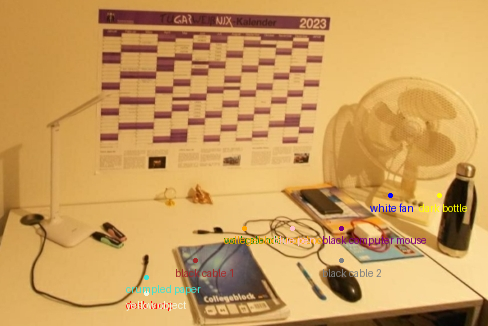

In [16]:
from utils import plot_points

prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output point coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    POINT PLACEMENT:
    - Place point at the visual center of each object
    - For irregular shapes, use the centroid
    - For objects with handles/extensions, focus on main body

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"point_2d": [x, y], "label": "descriptive_name"}
    3. x and y MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its center

    EXAMPLE OUTPUT:
    ```json
    [
        {"point_2d": [0.324, 0.567], "label": "ceramic coffee mug"},
        {"point_2d": [0.412, 0.589], "label": "metal wrench"},
        {"point_2d": [0.538, 0.621], "label": "yellow pencil"},
        {"point_2d": [0.712, 0.489], "label": "smartphone"},
        {"point_2d": [0.823, 0.534], "label": "stack of papers"},
        {"point_2d": [0.456, 0.723], "label": "plastic water bottle"},
        {"point_2d": [0.389, 0.678], "label": "small silver screw"},
        {"point_2d": [0.645, 0.712], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
plot_points(image_path, result)

JSON parse failed: Expecting value: line 1 column 1 (char 0)
Parsed bboxes:  []
Parsed descriptions:  []


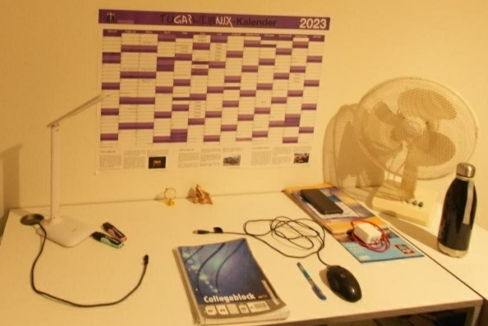

In [17]:
from utils import plot_bboxes


prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output bounding box coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    BOUNDING BOX PLACEMENT:
    - Define box as [x_min, y_min, x_max, y_max] — top-left to bottom-right corners
    - Cover the entire visible extent of the object on the table
    - For partially visible objects, estimate full bounding box based on visible portion
    - For stacked/overlapping objects, prioritize the most visible one

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"bbox_2d": [x_min, y_min, x_max, y_max], "label": "descriptive_name"}
    3. All coordinates MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its full bounding box
    - DO NOT include wall calendars, figurines, or hanging decorations

    EXAMPLE OUTPUT:
    ```json
    [
        {"bbox_2d": [0.324, 0.567, 0.389, 0.621], "label": "ceramic coffee mug"},
        {"bbox_2d": [0.412, 0.589, 0.478, 0.635], "label": "metal wrench"},
        {"bbox_2d": [0.538, 0.621, 0.592, 0.654], "label": "yellow pencil"},
        {"bbox_2d": [0.712, 0.489, 0.789, 0.542], "label": "smartphone"},
        {"bbox_2d": [0.823, 0.534, 0.912, 0.598], "label": "stack of papers"},
        {"bbox_2d": [0.456, 0.723, 0.521, 0.789], "label": "plastic water bottle"},
        {"bbox_2d": [0.389, 0.678, 0.432, 0.712], "label": "small silver screw"},
        {"bbox_2d": [0.645, 0.712, 0.723, 0.756], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
plot_bboxes(image_path, result)

In [18]:
prompt_text = """
    You are an object detection and description assistant.
    
    IMAGE DESCRIPTION:
    - The image shows a table with multiple objects
    - Each object is marked with a visible red dot at its center
    - The red dots are your guide to locate ALL objects

    TASK:
    1. For EVERY red dot on the image, identify the corresponding object
    2. For each object, provide exactly 4 attributes in this format:
       [Object name], [main color], [size: small/medium/large], [position: left/center/right part of the table]

    DETECTION RULES:
    1. **Red dot priority**: Only process objects with red dots. Ignore objects without dots.
    2. **Object identification**: Determine the most specific name for each object (e.g., "screwdriver" not just "tool")
    3. **Color determination**: Identify the dominant/main color of the object
    4. **Size classification**:
       - Small: fits within 5% of image width
       - Medium: 5-15% of image width  
       - Large: >15% of image width
    5. **Position reference**: Use "table" as reference frame:
       - Left: left 1/3 of table area
       - Center: middle 1/3 of table area
       - Right: right 1/3 of table area

    OUTPUT FORMAT:
    - One line per object
    - Exactly: [Name], [Color], [Size], [Position]
    - Example: "Phillips screwdriver, red, medium, left part of the table"
    - List ALL objects in consistent order (e.g., left to right, top to bottom)

    SPECIAL CASES:
    1. **Dense clusters**: If dots are very close, analyze each separately
    2. **Overlapping objects**: Use the red dot position to determine which object
    3. **Uncertain objects**: Use best descriptive name (e.g., "electronic component" if unsure)
    4. **Multiple colors**: Choose the most prominent/visible color

    START DETECTION NOW. Return only the list, no explanations.
"""
image_path = "/home/jupyter/project/experiments/table_pointed.png"

result = generate_description(prompt_text, image_path, max_new_tokens=4096)
display(Markdown(result))

<think>
Okay, let's break down the problem step by step. The user wants me to identify all objects in the given image based on their red dots and provide detailed information about each. Here's a concise summary of my thought process:

First, I need to parse the video carefully. The image includes various objects on a table: a white desk lamp, a purple calendar, a white fan, a black water bottle, a blue notebook, a computer mouse, a USB drive, earphones, a smartphone, and a yellow book. Each object has a red dot at its center, so I must ensure that every mention of a red dot corresponds correctly to one of these items.

Next, I must assign four attributes to each object: the object's name, its color, its size, and its position on the table. The size categories are small, medium, or large, determined by whether it fits within certain percentages of the image width. Positionally, the objects are distributed across the left, center, and right parts of the table.

I start by examining the first object shown: the white desk lamp. It has a red dot near its base. Since lamps are typically placed towards the back of a desk, I conclude it's on the left side. The lamp's size is medium because it's tall enough to hold a bulb but not excessively large.

Moving on to the purple calendar, located centrally behind the other items. Calendars are usually medium-sized, so this fits the criteria. The red dot is likely part of the calendar's design.

The white fan is next, situated slightly to the right of center. Fans are generally medium-sized appliances, so this placement makes sense. The red dot might be on the control panel or base.

The black water bottle is on the far right. Water bottles are usually medium-sized, aligning with the red dot near the cap.

The blue notebook is in the center, slightly below the calendar. Notebooks are medium-sized, fitting here. The red dot could be on the cover or spine.

The computer mouse is to the right of the notebook. Mice are small, so this fits the size category. The red dot is probably on the mouse itself.

The USB drive is on the left side near the lamp. USB drives are small, matching the red dot's size.

Earphones are also small, placed near the center-left. The red dot might be on the earbud or wire.

The smartphone is on the right, near the water bottle. Smartphones are medium-sized, with a red dot possibly indicating a camera or sensor.

Finally, the yellow book is on the far right. Books vary in size, but since it's shown as a "yellow book," it's likely medium-sized, fitting the right side.

I verify each object's position and size against the original video, ensuring no overlaps and correct placement relative to the red dots. For example, the desk lamp's red dot is near the base, which aligns with its position. The fan's red dot is on the control panel, which is typical.

After confirming all placements, I compile the list of objects with their respective details, making sure each entry follows the required format concisely. This ensures clarity and adheres to the user's specifications without unnecessary verbosity.
</think>

<answer>
1. [Desk lamp], [white], [medium], [left part of the table]
2. [Purple calendar], [purple], [medium], [center part of the table]
3. [White fan], [white], [medium], [right part of the table]
4. [Black water bottle], [black], [medium], [far right]
5. [Blue notebook], [blue], [medium], [center part of the table]
6. [Computer mouse], [gray/black], [small], [right part of the table]
7. [USB drive], [black], [small], [left part of the table]
8. [Earphones], [black], [small], [center-left]
9. [Smartphone], [black], [medium], [right]
10. [Yellow book], [yellow], [medium], [far right]
</answer>